In [92]:
import sympy as sp
import numpy as np

# The first step is to decompose the matrix we want to solve, in terms of tensor product of pauli operators , for that pourpose let us write a simple function that does this for any $4\times4$ Matrix, this function is pretty simple it computes the linear superposition of the 16 possible combinations and solves the system of equations so we have the coefficients for each of the combinations that would yield our matrix

In [115]:
def rando_SU2():
    x,y=Matriz.shape
    sigmax=sp.Matrix([[0,1],[1,0]])
    sigmay=sp.Matrix([[0,-sp.I],[sp.I,0]])
    sigmaz=sp.Matrix([[1,0],[0,-1]])
    Identity=sp.Matrix([[1,0],[0,1]])
    if x==y:
        II=sp.kronecker_product(Identity,Identity)
        IZ=sp.kronecker_product(Identity,sigmaz)
        IX=sp.kronecker_product(Identity,sigmax)
        IY=sp.kronecker_product(Identity,sigmay)
        ZI=sp.kronecker_product(sigmaz,Identity)
        ZZ=sp.kronecker_product(sigmaz,sigmaz)
        ZX=sp.kronecker_product(sigmaz,sigmax)
        ZY=sp.kronecker_product(sigmaz,sigmay)
        XI=sp.kronecker_product(sigmax,Identity)
        XZ=sp.kronecker_product(sigmax,sigmaz)
        XX=sp.kronecker_product(sigmax,sigmax)
        XY=sp.kronecker_product(sigmax,sigmay)
        YI=sp.kronecker_product(sigmay,Identity)
        YZ=sp.kronecker_product(sigmay,sigmaz)
        YX=sp.kronecker_product(sigmay,sigmax)
        YY=sp.kronecker_product(sigmay,sigmay)
        facundo=[II,IZ,IX,IY,ZI,ZZ,ZX,ZY,XI,XZ,XX,XY,YI,YZ,YX,YY]
        elementos=np.random.rand(16,1)
        reta=sp.zeros(x)
    else:
        print('The input is not a square matrix')
    for i in range(0,len(facundo)):
        reta+=facundo[i]*elementos[i]
    #coef_II=wawa[elementos[0]]
    #coef_ZZ=wawa[elementos[1]]
    #coef_XX=wawa[elementos[2]]
    #coef_YY=wawa[elementos[3]]
    return reta

In [116]:
a=rando_SU2()

In [117]:
a=(a+sp.conjugate(a.T))/2

In [118]:
a==sp.conjugate(a.T)

True

In [119]:
def paulidecompos(Matriz):
    x,y=Matriz.shape
    sigmax=sp.Matrix([[0,1],[1,0]])
    sigmay=sp.Matrix([[0,-sp.I],[sp.I,0]])
    sigmaz=sp.Matrix([[1,0],[0,-1]])
    Identity=sp.Matrix([[1,0],[0,1]])
    if x==y:
        II=sp.kronecker_product(Identity,Identity)
        IZ=sp.kronecker_product(Identity,sigmaz)
        IX=sp.kronecker_product(Identity,sigmax)
        IY=sp.kronecker_product(Identity,sigmay)
        ZI=sp.kronecker_product(sigmaz,Identity)
        ZZ=sp.kronecker_product(sigmaz,sigmaz)
        ZX=sp.kronecker_product(sigmaz,sigmax)
        ZY=sp.kronecker_product(sigmaz,sigmay)
        XI=sp.kronecker_product(sigmax,Identity)
        XZ=sp.kronecker_product(sigmax,sigmaz)
        XX=sp.kronecker_product(sigmax,sigmax)
        XY=sp.kronecker_product(sigmax,sigmay)
        YI=sp.kronecker_product(sigmay,Identity)
        YZ=sp.kronecker_product(sigmay,sigmaz)
        YX=sp.kronecker_product(sigmay,sigmax)
        YY=sp.kronecker_product(sigmay,sigmay)
        facundo=[II,IZ,IX,IY,ZI,ZZ,ZX,ZY,XI,XZ,XX,XY,YI,YZ,YX,YY]
        #facundo=[II,ZZ,XX,YY]
        elementos=sp.symbols('a0:16')
        reta=sp.zeros(x)
    else:
        print('The input is not a square matrix')
    for i in range(0,len(facundo)):
        reta+=facundo[i]*elementos[i]
    wawa=sp.solve(reta-Matriz)
    #coef_II=wawa[elementos[0]]
    #coef_ZZ=wawa[elementos[1]]
    #coef_XX=wawa[elementos[2]]
    #coef_YY=wawa[elementos[3]]
    return wawa

In [120]:
Matriz=sp.Matrix([[1,0,0,0],[0,0,-1,0],[0,-1,0,0],[0,0,0,1]])
lala=paulidecompos(a)

In [121]:
facundo=['II','IZ','IX','IY','ZI','ZZ','ZX','ZY','XI','XZ','XX','XY','YI','YZ','YX','YY']
elementos=sp.symbols('a0:16')
coeff={}
for i in range(len(facundo)):
    print('The coefficient for '+facundo[i]+' is '+str(round(lala[elementos[i]],)))
    coeff[facundo[i]]=lala[elementos[i]]

The coefficient for II is 0.587258383423317
The coefficient for IZ is 0.711586538241889
The coefficient for IX is 0.124786430303803
The coefficient for IY is 0.953183250102573
The coefficient for ZI is 0.801005236074818
The coefficient for ZZ is 0.771300217390126
The coefficient for ZX is 0.563581297820169
The coefficient for ZY is 0.182287564189387
The coefficient for XI is 0.231924233429429
The coefficient for XZ is 0.491413114012572
The coefficient for XX is 0.479531936705990
The coefficient for XY is 0.781763374413668
The coefficient for YI is 0.947611766416190
The coefficient for YZ is 0.694425523764709
The coefficient for YX is 0.553961310236932
The coefficient for YY is 0.964795463855159


In [122]:
coeff

{'II': 0.587258383423317,
 'IZ': 0.711586538241889,
 'IX': 0.124786430303803,
 'IY': 0.953183250102573,
 'ZI': 0.801005236074818,
 'ZZ': 0.771300217390126,
 'ZX': 0.563581297820169,
 'ZY': 0.182287564189387,
 'XI': 0.231924233429429,
 'XZ': 0.491413114012572,
 'XX': 0.479531936705990,
 'XY': 0.781763374413668,
 'YI': 0.947611766416190,
 'YZ': 0.694425523764709,
 'YX': 0.553961310236932,
 'YY': 0.964795463855159}

# So the hamiltonian we are asked to decompose in terms of pauli operators can be written as $H=\frac{1}{2} (I_{1}\otimes I_{2}+Z_{1}\otimes Z_{2}-Y_{1}\otimes Y_{2}-X_{1}\otimes X_{2})$, this hamiltonian has four parts namely:

$H_{1}=X_{1}\otimes X_{2}$,$H_{2}=Y_{1}\otimes Y_{2}$,$H_{3}=Z_{1}\otimes Z_{2}$,$H_{4}=I_{1}\otimes I_{2}$

In [123]:
ppp=abs(a)

In [124]:
a.eigenvals()

{4.81518704957602 - 3.04679071623029e-64*I: 1,
 0.525809158343994 - 1.4653936691699e-64*I: 1,
 -2.01056307132851 - 3.26859690962891e-64*I: 1,
 -0.98139960289823 + 1.97449315926423e-64*I: 1}

In [9]:
sigmax=sp.Matrix([[0,1],[1,0]])
sigmay=sp.Matrix([[0,-sp.I],[sp.I,0]])
sigmaz=sp.Matrix([[1,0],[0,-1]])
Identity=sp.Matrix([[1,0],[0,1]])

In [10]:
sigmax.eigenvals()

{-1: 1, 1: 1}

In [11]:
sigmay.eigenvals()

{-1: 1, 1: 1}

In [12]:
sigmaz.eigenvals()

{1: 1, -1: 1}

# We will use the ansatz that was provided as a clue, that is $RX_{1}(\theta)\otimes I_{2} CX H_{1}\otimes I_{2}$ where RX is the rotation in X gate, CX is a CNOT gate, H is a hadamard gate, and I is the identity, the subindices denote the qubit they act on, let us visualize the circuit that implements such an ansatz, I will select a particular value of $\theta$ just for the visualization

In [125]:
from qiskit import *

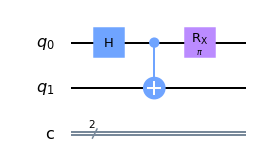

In [126]:
circuit=QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0, 1)
circuit.rx(np.pi, 0)
circuit.draw('mpl')

# We now implement this ansatz as a python function, Why ? so it can be called upon to use theta as a parameter, as qiskit doesn't allow the RX parameter to be a variable

In [127]:
def ansatz(circuit, theta):
    q = circuit.qregs[0]
    circuit.h(q[0])
    circuit.cx(q[0], q[1])
    circuit.rx(theta, q[0])
    return circuit

In [128]:
def two_qubit_vqe(theta, basis):
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    circuit = QuantumCircuit(q, c)

    # implement the ansate in the circuit
    circuit = ansatz(circuit, theta)
    # measurement
    if basis == 'ZZ':
        circuit.measure(q, c)
    elif basis == 'XX':
        circuit.u2(0, np.pi, q[0])
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'YY':
        circuit.u2(0, np.pi/2, q[0])
        circuit.u2(0, np.pi/2, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'IX':
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'IY':
        circuit.u2(0, np.pi/2, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'IZ':
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'ZI':
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'ZX':
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'ZY':
        circuit.u2(0, np.pi/2, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'XI':
        circuit.u2(0, np.pi, q[0])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'XZ':
        circuit.u2(0, np.pi, q[0])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'XX':
        circuit.u2(0, np.pi, q[0])
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'XY':
        circuit.u2(0, np.pi, q[0])
        circuit.u2(0, np.pi/2, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'YZ':
        circuit.u2(0, np.pi/2, q[0])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'YI':
        circuit.u2(0, np.pi/2, q[0])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'YX':
        circuit.u2(0, np.pi/2, q[0])
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    else:
        raise ValueError('Not a valid pauli basis, input should be X,Y or Z, we excluded I because no circuit is needed')

    return circuit


In [146]:
def get_expectation(theta, basis):
    
    if basis == 'II':
        return 1
    else:
        circuit = two_qubit_vqe(theta, basis)
    
    shots = 65536 # My birthyear c:
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(circuit, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    expected_value = 0
    for event in counts:
        pm = 1
        if event == '01':
            pm = -1
        if event == '10':
            pm = -1
        expected_value += pm * counts[event] / shots
        
    return expected_value

In [147]:
def vqe_ground(theta):
    sum_=0
    for i in facundo:
         sum_+=coeff[i]*get_expectation(theta, i)

    
    # summing the measurement results    
    return sum_

In [148]:
vqe_ground(np.pi)

-0.253607819133672

In [149]:
import numpy as np
theta2=sp.Symbol('theta2',real=True)

In [150]:
xxxx=np.arange(-np.pi,np.pi,np.pi/64)
vqeeee = [ vqe_ground(i) for i in xxxx]


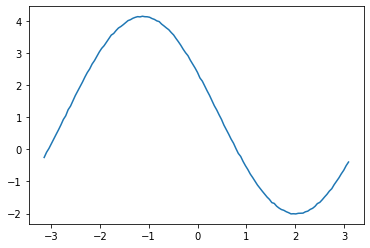

In [151]:
import matplotlib.pyplot as plt
plt.plot(xxxx,vqeeee)
plt.show()

In [152]:
min(vqeeee)

-2.01109934708634